In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import os
import sys
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
import ProjectFunctions as F
import ElasticCrossSections as el
import CaptureCrossSections as cap
import PeriodicTable as pt

to_DRU = F.kg*F.day/pt.Si.mass # Si particle sec day^-1 kg^-1

In [3]:
# load data if it already exists

filespec = 'pnr_improved1'

NR = 300 # number of points in recoil energy grid to save
NN = 400 # number of points in neutron energy grid to save

currents_file = f'{filespec}_currents_dat.txt'
pRR_file = f'{filespec}_{NR}_pRR.txt'
pNR_file = f'{filespec}_{NR}_{NN}_pNR.txt'
ptot_file = f'{filespec}_{NR}_ptot.txt'
output_dir = 'papers/data/'

use_saved = True

ptot_loaded = False

print(currents_file)

if use_saved:
    
    if ptot_file in os.listdir(output_dir):
        with open(output_dir + ptot_file, 'rb') as f:
            ptot = pickle.load(f)
        ptot_loaded = True
    
if use_saved and currents_file in os.listdir(output_dir):
    with open(output_dir + currents_file, 'rb') as file:
        I, Fs = pickle.load(file)  
    
#I1 = F.interpolate_yvals_with_overlap(Ens, E_neut, spec['spec'].values)#np.exp(-Ens*10/Ens.max()) # incident flux   
#totalflux = F.trap(E_neut, spec['spec'].values)


pnr_improved1_currents_dat.txt


In [4]:
print(Fs)

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       9.12338598e-44, 2.50824966e-44, 0.00000000e+00]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       2.17832994e-46, 3.27996900e-47, 0.00000000e+00]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       4.10183503e-49, 3.17400736e-50, 0.00000000e+00]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.26271091e-52, 2.36700629e-53, 0.00000000e+00]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       7.93321987e-55, 1.39882870e-56, 0.00000000e+00]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       8.49210470e-58, 6.67899208e-60, 0.00000000e+00])]


In [5]:
print(ptot)

[[8.09128029e-05 8.09126675e-05 8.09125242e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [6]:
spec = pd.DataFrame.from_dict({'E': np.linspace(1e3, 1e4, 10_000), 'spec': np.ones(10_000)})
Ers_recoil = np.geomspace(1e-15, F.max_Er(max(spec['E']), '28'), 15_000) # recoil energies [eV]
Ers = np.geomspace(1, 2e7, NR) 
Ens = np.geomspace(Ers[0]*0.01, Ers[-1]*20, NN) # neutron energies

In [7]:
first_scatter_rate = F.trap(Ers_recoil, Fs[0])
print(f'first scatter rate per paticle: {first_scatter_rate:.4e} s^-1')

for i, f in enumerate(Fs):
    if i:
        rate = F.trap(Ers_recoil, f)
        print(f'{i+1}-scatter rate = {rate:.4e} s^-1 ({100*rate/first_scatter_rate:.5f}% of first scatters)')

total_scatter_rate = F.trap(Ers_recoil, sum(Fs))

print(f'total of first four scatters: {total_scatter_rate:.4e} s^-1 ({100*(total_scatter_rate - first_scatter_rate)/first_scatter_rate:.3f}% increase)')

first scatter rate per paticle: 2.4755e-32 s^-1
2-scatter rate = 1.5380e-33 s^-1 (6.21304% of first scatters)
3-scatter rate = 1.1849e-34 s^-1 (0.47867% of first scatters)
4-scatter rate = 1.0283e-35 s^-1 (0.04154% of first scatters)
5-scatter rate = 9.2002e-37 s^-1 (0.00372% of first scatters)
6-scatter rate = 7.9990e-38 s^-1 (0.00032% of first scatters)
total of first four scatters: 2.6423e-32 s^-1 (6.737% increase)


In [8]:
# in table form:

def table_string(flucks, percent):
    #first_col = r'\times10^{'.join(f'${flucks:.4e}'.split('e')) + r'}$'
    first_col = f'{flucks:.5g}' 
    second_col = f'{percent:.4f}\\%'
    return ' ' + first_col + ' & ' + second_col + r'\\' + '\n' + r'\hline'

totalRates = [] # total rates of scatters (DRU)

for i, f in enumerate(Fs):
    rate = F.trap(Ers_recoil, f)
    totalRates.append(rate)
    print( f'{i+1}' + r' & ' + table_string(rate*to_DRU, 100*rate/first_scatter_rate))

total_scatter_rate = F.trap(Ers_recoil, sum(Fs))
print(r'total &' + table_string(total_scatter_rate*to_DRU, 100*total_scatter_rate/first_scatter_rate))

1 &  0.045861 & 100.0000\%\\
\hline
2 &  0.0028494 & 6.2130\%\\
\hline
3 &  0.00021952 & 0.4787\%\\
\hline
4 &  1.9051e-05 & 0.0415\%\\
\hline
5 &  1.7044e-06 & 0.0037\%\\
\hline
6 &  1.4819e-07 & 0.0003\%\\
\hline
total & 0.048951 & 106.7373\%\\
\hline


In [9]:
# total rates of exactly i scatters (rho_i in paper) [kg^-1 day^-1]
exact_rates = [totalRates[i] - totalRates[i+1] for i in range(len(totalRates)-1)] + [totalRates[-1]]
# approx last totalRate as zero (neglect beyond i = 6)

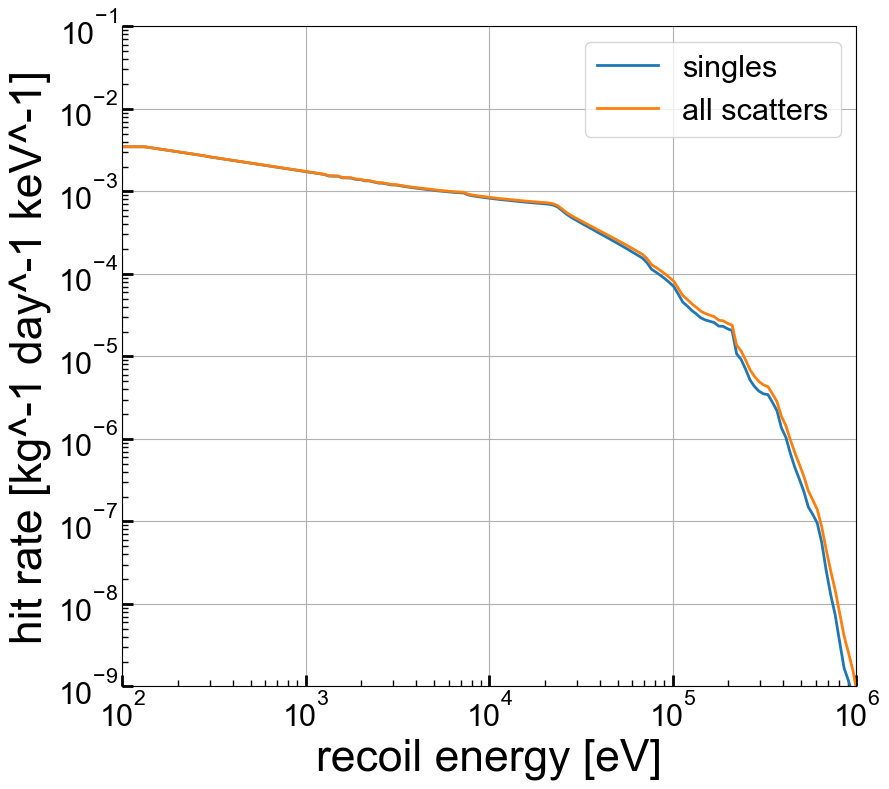

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


F_total = sum([exact_rates[i]*ptot[i] for i in range(6)])
F_singles = exact_rates[0]*ptot[0]
F_multiples = sum([exact_rates[i]*ptot[i] for i in range(1,6)])

plt.plot(Ers, to_DRU*F_singles*1000, label = 'singles')
#plt.plot(Ers_recoil, to_DRU*sum(Fs), label = 'all scatters')
#plt.plot(Ers, to_DRU*F_multiples, label = 'multiples')
plt.plot(Ers, to_DRU*F_total*1000, label = 'all scatters')

ymin = 1e-9
ymax = 1e-1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e2, 1e6) 
ax1.set_ylim(ymin,ymax)


plt.xlabel('recoil energy [eV]')
plt.ylabel('hit rate [kg^-1 day^-1 keV^-1]')
plt.legend()
plt.tight_layout()

if False:
    plt.savefig('../local/figures/sum_scatters.pdf')
    print('saved')